# Project - Airbnb

## The Data

Airbnb, Inc. is an American online marketplace company based in San Francisco, California, United States. Airbnb offer arrangement for lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking.

We will be using the Airbnb DataSet (Amsterdam, North Holland, The Netherlands).

The data is from Airbnb: http://insideairbnb.com/get-the-data.html.

## Our Goal

Given descriptions and features of listing of housings from historical dataset, can we build a model that can predict the price of a certain housing? 

The "price" column contains our label.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#pd.set_option('display.max_columns', None)

# Loading the data

In [2]:
df = pd.read_csv('C:/Users/wangy/Downloads/listings.csv/listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20190808195507,2019-08-09,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.12
1,20168,https://www.airbnb.com/rooms/20168,20190808195507,2019-08-09,Studio with private bathroom in the centre 1,"Cozy studio on your own private floor, 100% in...",For those who like all facets of city life. In...,"Cozy studio on your own private floor, 100% in...",none,Located just in between famous central canals....,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,2.46
2,25428,https://www.airbnb.com/rooms/25428,20190808195507,2019-08-09,Lovely apt in City Centre (w.lift) near Jordaan,NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.16
3,27886,https://www.airbnb.com/rooms/27886,20190808195507,2019-08-09,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.11
4,28871,https://www.airbnb.com/rooms/28871,20190808195507,2019-08-09,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,...,f,f,moderate,f,f,3,0,3,0,2.59


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20677 entries, 0 to 20676
Data columns (total 106 columns):
id                                              int64
listing_url                                     object
scrape_id                                       int64
last_scraped                                    object
name                                            object
summary                                         object
space                                           object
description                                     object
experiences_offered                             object
neighborhood_overview                           object
notes                                           object
transit                                         object
access                                          object
interaction                                     object
house_rules                                     object
thumbnail_url                                   float64
medium_url 

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,20677.0,1.791013e+07,1.041987e+07,2.818000e+03,9.340207e+06,1.774427e+07,2.601974e+07,3.759099e+07
scrape_id,20677.0,2.019081e+13,7.800970e+00,2.019081e+13,2.019081e+13,2.019081e+13,2.019081e+13,2.019081e+13
thumbnail_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xl_picture_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,20677.0,5.666981e+07,6.812902e+07,3.159000e+03,8.795077e+06,2.618942e+07,7.754037e+07,2.839422e+08
host_acceptance_rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,20665.0,7.010888e+00,3.772955e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,9.800000e+02
host_total_listings_count,20665.0,7.010888e+00,3.772955e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,9.800000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bath

In [6]:
# Drop columns with useless descriptions or ids or urls or locations and columns with no values.
new_df = df.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access',
       'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
       'picture_url', 'xl_picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about','host_acceptance_rate',
       'host_thumbnail_url', 'host_picture_url','host_neighbourhood',
       'street','neighbourhood','neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact','calendar_updated', 'has_availability','calendar_last_scraped',
       'first_review', 'last_review','license','jurisdiction_names'],axis=1)

In [7]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
host_listings_count,20665.0,7.010888,37.729548,0.00,1.00,1.00,2.00,980.00
host_total_listings_count,20665.0,7.010888,37.729548,0.00,1.00,1.00,2.00,980.00
accommodates,20677.0,2.879335,1.314935,1.00,2.00,2.00,4.00,30.00
bathrooms,20671.0,1.158580,0.380091,0.00,1.00,1.00,1.00,15.00
bedrooms,20669.0,1.454400,0.894856,0.00,1.00,1.00,2.00,12.00
beds,20669.0,1.829213,1.407580,0.00,1.00,1.00,2.00,32.00
square_feet,386.0,548.435233,555.655913,0.00,0.00,484.00,861.00,3229.00
guests_included,20677.0,1.459351,0.935662,1.00,1.00,1.00,2.00,16.00
minimum_nights,20677.0,3.546694,18.690394,1.00,2.00,2.00,3.00,1001.00
maximum_nights,20677.0,617.663297,537.978553,1.00,21.00,1125.00,1125.00,1825.00


# Section 1: Exploratory Data Analysis

In [8]:
new_df['price']

0         $59.00
1         $80.00
2        $125.00
3        $150.00
4         $75.00
          ...   
20672     $47.00
20673    $200.00
20674     $90.00
20675    $219.00
20676     $75.00
Name: price, Length: 20677, dtype: object

In [9]:
# convert 'price' into numeric type
new_df['price'] = pd.to_numeric(new_df['price'].apply(lambda x: x[1:]).apply(lambda x: x.replace(',','')))

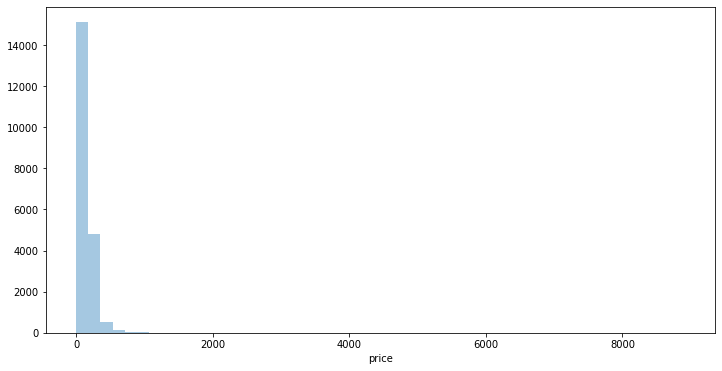

In [10]:
# Histogram of 'price'
plt.figure(figsize=(12,6))
sns.distplot(new_df['price'],kde=False,bins=50)

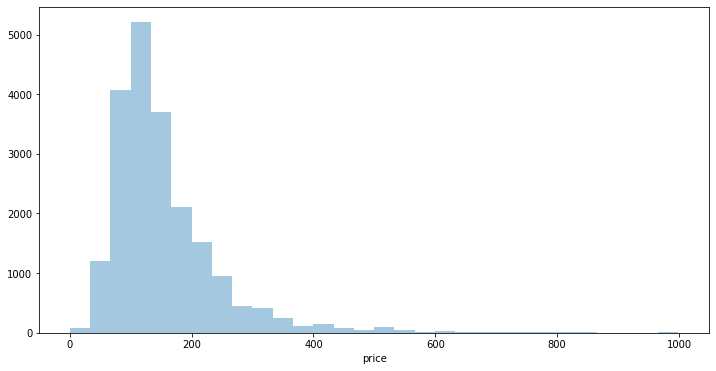

In [11]:
# Histogram of 'price' that less than 1000
plt.figure(figsize=(12,6))
sns.distplot(new_df[new_df['price']<1000]['price'],kde=False,bins=30)

We can see that most of the housings have price less than $300. And it's reasonable to treat housings with price greater than 600 as outliers.

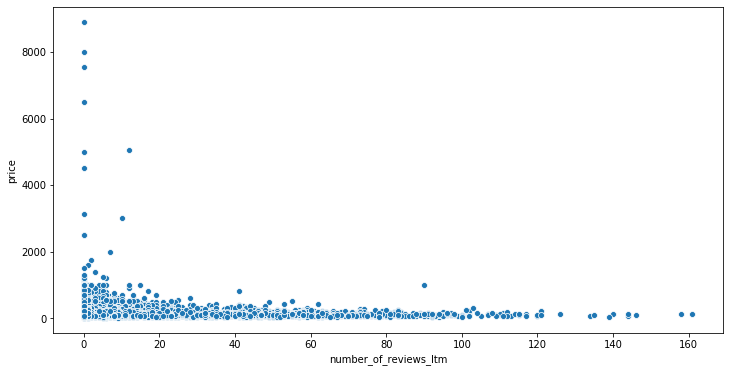

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=new_df,x='number_of_reviews_ltm',y='price')

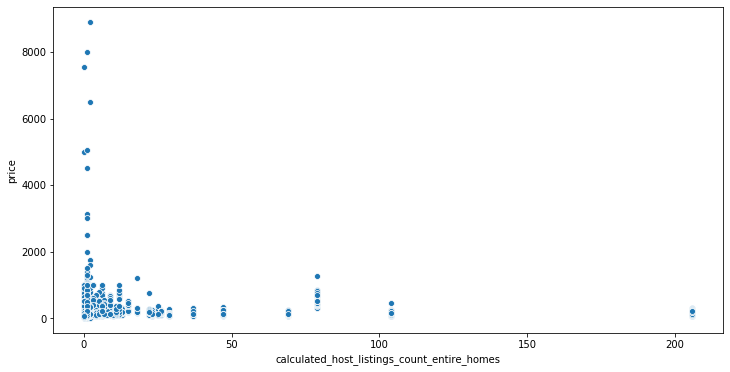

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=new_df,x='calculated_host_listings_count_entire_homes',y='price')

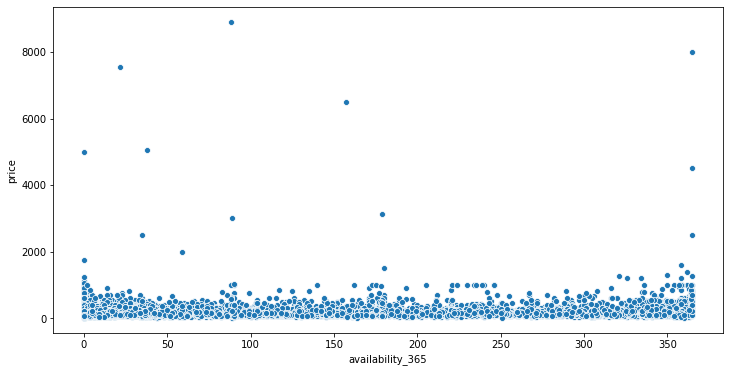

In [14]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=new_df,x='availability_365',y='price')

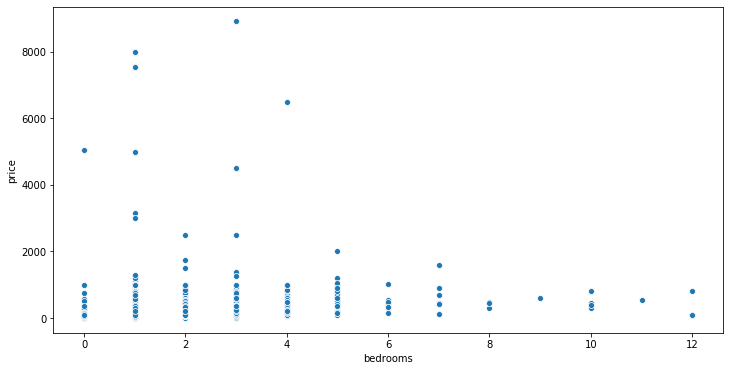

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=new_df,x='bedrooms',y='price')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 <a list of 22 Text xticklabel objects>)

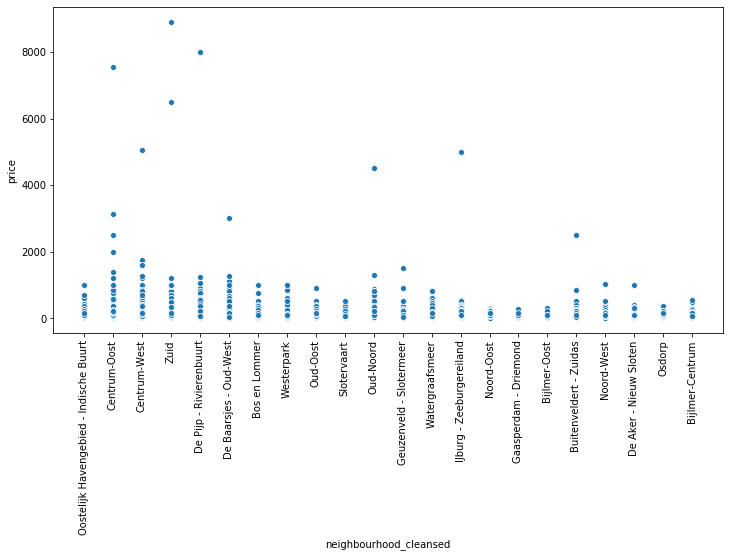

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=new_df,x='neighbourhood_cleansed',y='price')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

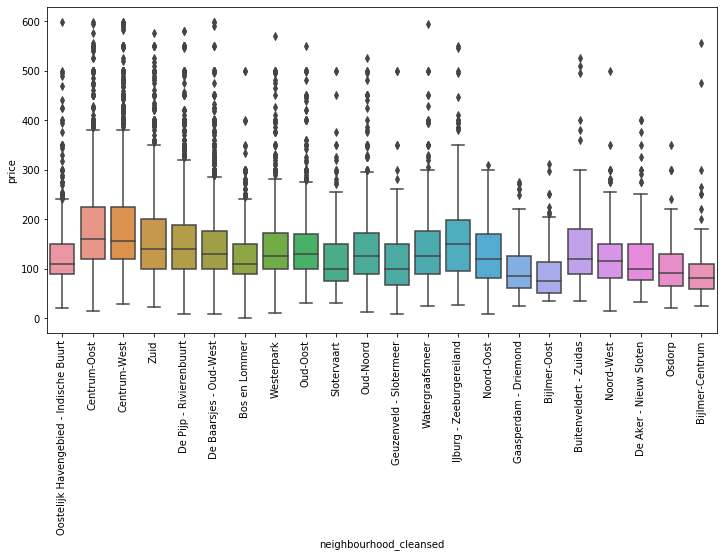

In [17]:
plt.figure(figsize=(12,6))
sns.boxplot(data=new_df[new_df['price']<600],x='neighbourhood_cleansed',y='price')
plt.xticks(rotation=90)

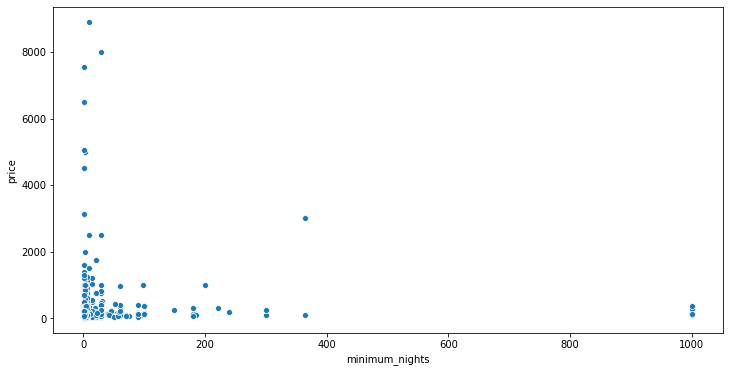

In [18]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=new_df,x='minimum_nights',y='price')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 <a list of 35 Text xticklabel objects>)

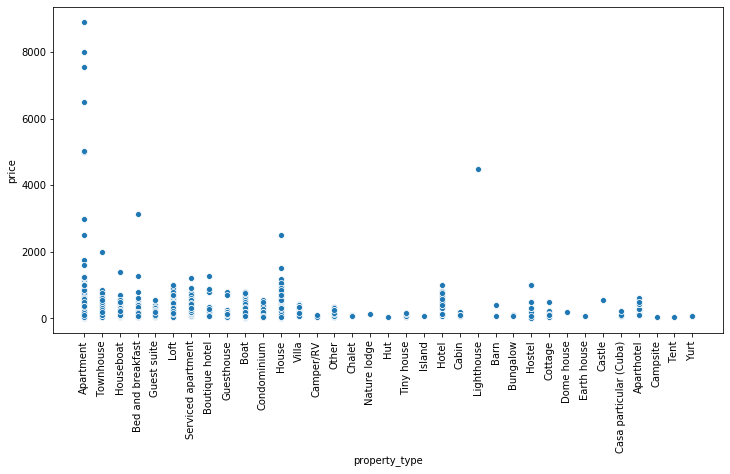

In [19]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=new_df,x='property_type',y='price')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

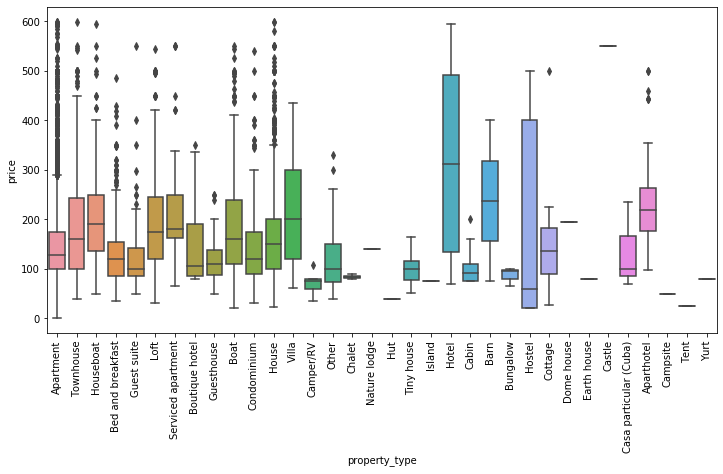

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(data=new_df[new_df['price']<600],x='property_type',y='price')
plt.xticks(rotation=90)

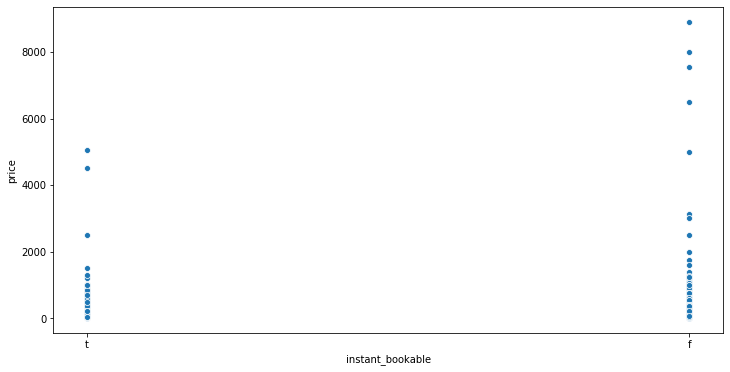

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=new_df,x='instant_bookable',y='price')

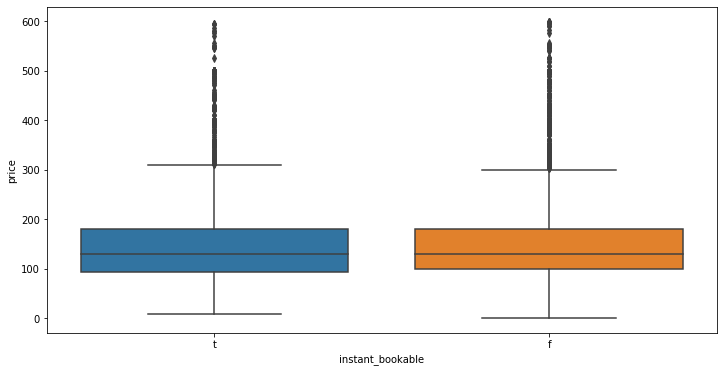

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=new_df[new_df['price']<600],x='instant_bookable',y='price')

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

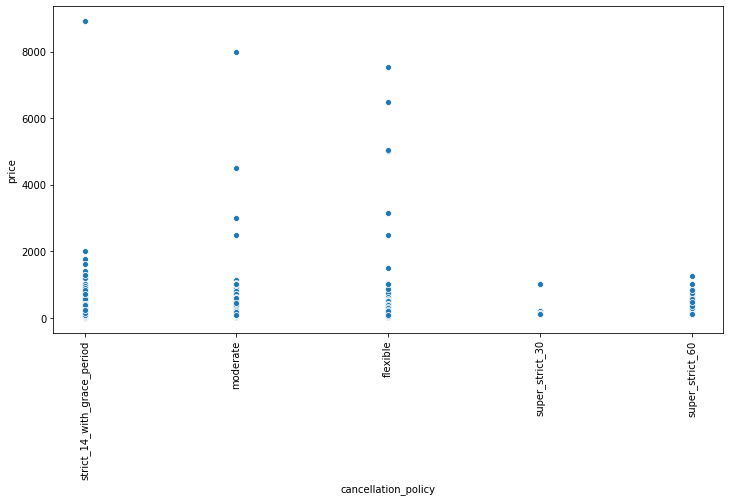

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=new_df,x='cancellation_policy',y='price')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

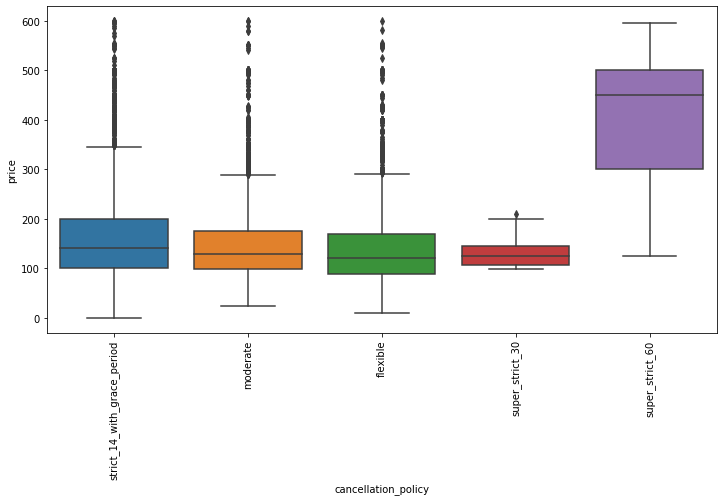

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=new_df[new_df['price']<600],x='cancellation_policy',y='price')
plt.xticks(rotation=90)

([0, 1, 2], <a list of 3 Text xticklabel objects>)

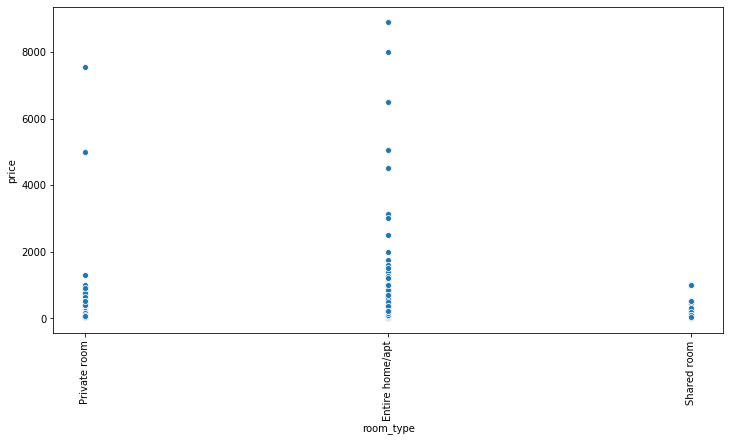

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=new_df,x='room_type',y='price')
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

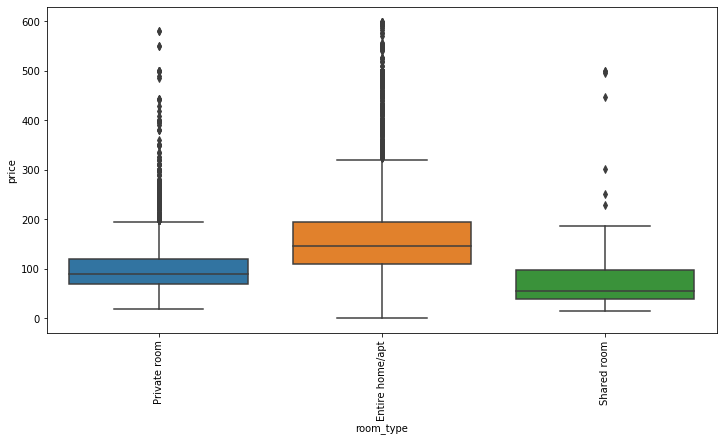

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(data=new_df[new_df['price']<600],x='room_type',y='price')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

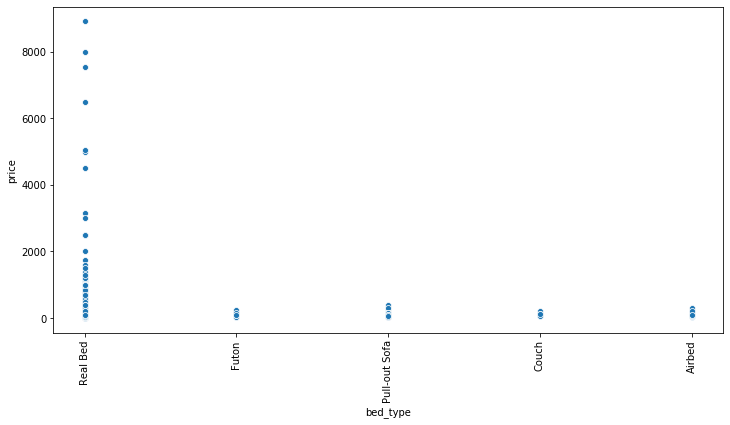

In [27]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=new_df,x='bed_type',y='price')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

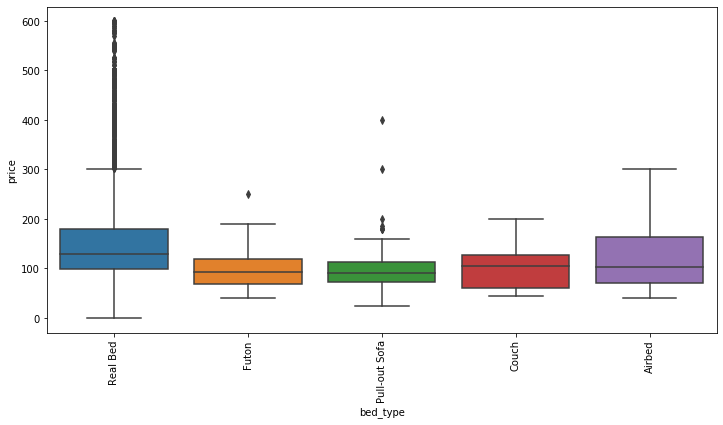

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(data=new_df[new_df['price']<600],x='bed_type',y='price')
plt.xticks(rotation=90)

# Section 2: Data Preprocessing

## Missing Data

In [29]:
def missing_data(data):
    '''
    Helper Function - Missing data check
    Output percentages of missing data in a descending order.
    '''
    missing = data.isnull().sum()
    available = data.count()
    total = (missing + available)
    percent = (data.isnull().sum()/data.isnull().count()*100).round(4)
    return pd.concat([missing, available, total, percent], axis=1, keys=['Missing', 'Available', 'Total', 'Percent']).sort_values(['Missing'], ascending=False)

In [30]:
missing_data(new_df)

,Missing,Available,Total,Percent
square_feet,20291,386,20677,98.1332
monthly_price,19269,1408,20677,93.1905
weekly_price,18086,2591,20677,87.4692
host_response_time,8541,12136,20677,41.3068
host_response_rate,8541,12136,20677,41.3068
security_deposit,6202,14475,20677,29.9947
cleaning_fee,3721,16956,20677,17.9958
review_scores_checkin,2837,17840,20677,13.7206
review_scores_value,2835,17842,20677,13.7109
review_scores_location,2835,17842,20677,13.7109


In [31]:
# Drop columns with over 15% of missing values.
new_df.drop(['square_feet','weekly_price','monthly_price','host_response_time',
             'host_response_rate','security_deposit', 'cleaning_fee',],axis=1, inplace=True)

In [32]:
new_df.corr().style.background_gradient(cmap='Wistia',axis=1).format("{:.6f}")

In [33]:
# Drop columns with high correlations that may cause multicollinearity.
new_df.drop(['host_listings_count','host_total_listings_count','calculated_host_listings_count'],
            axis=1,inplace=True) # highly correlated with column 'calculated_host_listings_count_entire_homes'
new_df.drop(['accommodates','beds'],axis=1,inplace=True) # highly correlated with column 'bedrooms'
new_df.drop(['minimum_minimum_nights','maximum_minimum_nights','minimum_nights_avg_ntm'],
            axis=1,inplace=True) # highly correlated with column 'minimum_nights'
new_df.drop(['minimum_maximum_nights','maximum_maximum_nights','maximum_nights_avg_ntm'],
            axis=1,inplace=True) # highly correlated with column 'maximum_nights'
new_df.drop(['availability_30','availability_60','availability_90'],
            axis=1,inplace=True) # highly correlated with column 'availability_365'
new_df.drop(['number_of_reviews','reviews_per_month'],axis=1,inplace=True) # highly correlated with column 'number_of_reviews_ltm'
new_df.drop(['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
            'review_scores_communication','review_scores_value'],axis=1,inplace=True) # highly correlated with column 'review_scores_rating'

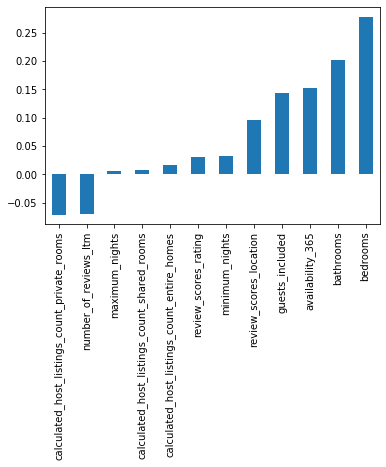

In [34]:
new_df.corr()['price'].sort_values().drop('price').plot.bar()

We can see that the price is most correlated to the number of bedrooms, which is kind of intuitive.

In [35]:
# Fill missing values with mean for column 'review_scores_location' and 'review_scores_rating'
new_df[['review_scores_location','review_scores_rating']] = new_df[['review_scores_location','review_scores_rating']].fillna(value=new_df[['review_scores_location','review_scores_rating']].mean())

In [36]:
# drop rows with missing values, since the percentage is comparatively low (less than 0.1%).
new_df.dropna(inplace=True)

In [37]:
# drop outliers (housings with price greater than 600 dollars)
new_df = new_df[new_df['price']<600]

In [38]:
new_df.reset_index(inplace=True)

In [39]:
new_df.drop('index',axis=1,inplace=True)

In [40]:
new_df

,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,bed_type,...,review_scores_location,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,t,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,Oostelijk Havengebied - Indische Buurt,Apartment,Private room,1.5,1.0,Real Bed,...,10.000000,f,t,f,strict_14_with_grace_period,f,f,0,1,0
1,f,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,Centrum-Oost,Townhouse,Private room,1.0,1.0,Real Bed,...,10.000000,f,f,f,strict_14_with_grace_period,f,f,0,2,0
2,f,"['email', 'phone', 'reviews']",t,f,Centrum-West,Apartment,Entire home/apt,1.0,1.0,Real Bed,...,10.000000,f,f,f,strict_14_with_grace_period,f,f,2,0,0
3,t,"['email', 'phone', 'reviews', 'jumio']",t,t,Centrum-West,Houseboat,Private room,1.0,1.0,Real Bed,...,10.000000,f,t,f,strict_14_with_grace_period,f,f,0,1,0
4,t,"['email', 'phone', 'reviews', 'jumio']",t,t,Centrum-West,Apartment,Private room,1.0,1.0,Real Bed,...,10.000000,f,f,f,moderate,f,f,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20467,f,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,De Baarsjes - Oud-West,Apartment,Shared room,1.0,1.0,Real Bed,...,9.476124,f,t,f,flexible,f,f,0,0,1
20468,f,"['email', 'phone']",t,f,Oud-Noord,Townhouse,Entire home/apt,1.0,2.0,Real Bed,...,9.476124,f,t,f,flexible,f,f,1,0,0
20469,f,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Buitenveldert - Zuidas,Apartment,Private room,1.0,1.0,Real Bed,...,9.476124,f,f,f,moderate,f,f,0,1,0
20470,f,"['email', 'phone', 'google', 'reviews', 'offli...",t,f,Centrum-Oost,Houseboat,Entire home/apt,1.0,1.0,Real Bed,...,9.476124,f,f,f,strict_14_with_grace_period,f,f,6,2,0


## Categorical Variables and Dummy Variables

In [41]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20472 entries, 0 to 20471
Data columns (total 29 columns):
host_is_superhost                               20472 non-null object
host_verifications                              20472 non-null object
host_has_profile_pic                            20472 non-null object
host_identity_verified                          20472 non-null object
neighbourhood_cleansed                          20472 non-null object
property_type                                   20472 non-null object
room_type                                       20472 non-null object
bathrooms                                       20472 non-null float64
bedrooms                                        20472 non-null float64
bed_type                                        20472 non-null object
amenities                                       20472 non-null object
price                                           20472 non-null float64
guests_included                                 

In [42]:
#Scratch all columns with non numeric value.
new_df.select_dtypes(exclude=['float64','int64']).columns

Index(['host_is_superhost', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'property_type',
       'room_type', 'bed_type', 'amenities', 'extra_people',
       'requires_license', 'instant_bookable', 'is_business_travel_ready',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification'],
      dtype='object')

In [43]:
new_df['host_is_superhost'].value_counts()

f    17288
t     3184
Name: host_is_superhost, dtype: int64

In [44]:
# convert 'true' or 'false' into numeric '0's and '1's
new_df['host_is_superhost'] = new_df['host_is_superhost'].apply(lambda x: 1 if x=='t' else 0)

In [45]:
new_df['host_verifications'].value_counts()

['email', 'phone', 'reviews', 'jumio']                                                                           3110
['email', 'phone', 'reviews']                                                                                    2532
['email', 'phone', 'reviews', 'jumio', 'offline_government_id', 'selfie', 'government_id', 'identity_manual']    1766
['email', 'phone']                                                                                               1488
['email', 'phone', 'facebook', 'reviews', 'jumio']                                                               1165
                                                                                                                 ... 
['email', 'facebook']                                                                                               1
['email', 'phone', 'facebook', 'manual_offline', 'jumio']                                                           1
['email', 'phone', 'manual_online', 'jumio']            

In [46]:
def split_features(column):
    '''
    Extract all existing features from feature strings.
    Output a set of feature list.
    '''
    feature_list=set()
    length = len(column)
    for i in range(length):
        features = column[i][1:-1].replace("'",'').replace('"','').replace(' ','').split(',')
        column[i] = features
        for feature in features:
            if feature != '':
                feature_name = column.name + '_' + feature
                feature_list.add(feature_name)
    return feature_list

In [47]:
def create_feature_columns(column, feature_list):
    '''
    For each feature in the feature list, create a corresponding feature column.
    Set values for each feature column according to feature strings.
    1 = has this feature
    0 = does not have this feature
    '''
    length = len(column)
    for feature_column in feature_list:
        new_df[feature_column] = [0]*length
    for j in range(length):
        for k in column[j]:
            if k != '':
                feature_name = column.name + '_' + k
                new_df[feature_name][j] = 1 

In [48]:
feature_list_host_verifications = split_features(new_df['host_verifications'])

In [49]:
create_feature_columns(new_df['host_verifications'], feature_list_host_verifications)

In [50]:
new_df.head()

,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,bed_type,...,host_verifications_google,host_verifications_sesame_offline,host_verifications_phone,host_verifications_manual_offline,host_verifications_jumio,host_verifications_facebook,host_verifications_kba,host_verifications_manual_online,host_verifications_identity_manual,host_verifications_work_email
0,1,"[email, phone, reviews, jumio, offline_governm...",t,f,Oostelijk Havengebied - Indische Buurt,Apartment,Private room,1.5,1.0,Real Bed,...,0,0,1,0,1,0,0,0,1,0
1,0,"[email, phone, reviews, jumio, offline_governm...",t,f,Centrum-Oost,Townhouse,Private room,1.0,1.0,Real Bed,...,0,0,1,0,1,0,0,0,1,0
2,0,"[email, phone, reviews]",t,f,Centrum-West,Apartment,Entire home/apt,1.0,1.0,Real Bed,...,0,0,1,0,0,0,0,0,0,0
3,1,"[email, phone, reviews, jumio]",t,t,Centrum-West,Houseboat,Private room,1.0,1.0,Real Bed,...,0,0,1,0,1,0,0,0,0,0
4,1,"[email, phone, reviews, jumio]",t,t,Centrum-West,Apartment,Private room,1.0,1.0,Real Bed,...,0,0,1,0,1,0,0,0,0,0


In [51]:
feature_list_amenities = split_features(new_df['amenities'])

In [52]:
create_feature_columns(new_df['amenities'], feature_list_amenities)

In [53]:
new_df.head()

,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,bathrooms,bedrooms,bed_type,...,amenities_Cat(s),amenities_Crib,amenities_Pack’nPlay/travelcrib,amenities_Nostairsorstepstoenter,amenities_Suitableforevents,amenities_Buildingstaff,amenities_Coffeemaker,amenities_Showerchair,amenities_Widehallways,amenities_Disabledparkingspot
0,1,"[email, phone, reviews, jumio, offline_governm...",t,f,Oostelijk Havengebied - Indische Buurt,Apartment,Private room,1.5,1.0,Real Bed,...,0,0,0,1,0,0,0,0,0,0
1,0,"[email, phone, reviews, jumio, offline_governm...",t,f,Centrum-Oost,Townhouse,Private room,1.0,1.0,Real Bed,...,0,0,0,0,0,0,0,0,0,0
2,0,"[email, phone, reviews]",t,f,Centrum-West,Apartment,Entire home/apt,1.0,1.0,Real Bed,...,0,0,0,0,0,0,0,0,0,0
3,1,"[email, phone, reviews, jumio]",t,t,Centrum-West,Houseboat,Private room,1.0,1.0,Real Bed,...,0,0,0,0,0,0,0,0,0,0
4,1,"[email, phone, reviews, jumio]",t,t,Centrum-West,Apartment,Private room,1.0,1.0,Real Bed,...,1,0,0,0,0,0,0,0,0,0


In [54]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20472 entries, 0 to 20471
Columns: 173 entries, host_is_superhost to amenities_Disabledparkingspot
dtypes: float64(5), int64(153), object(15)
memory usage: 27.0+ MB


In [55]:
new_df.drop(['host_verifications','amenities'],axis=1,inplace=True)

In [56]:
len(feature_list_amenities)

125

In [57]:
amenities_dist = []
for i in feature_list_amenities:
    amenities_dist.append(new_df[i].mean())

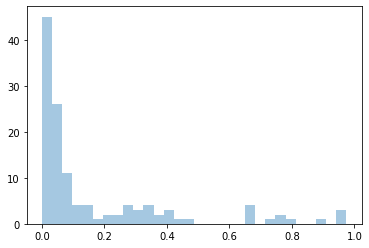

In [58]:
sns.distplot(amenities_dist,kde=False,bins=30)

In [59]:
dist = pd.Series(amenities_dist)
dist[dist>0.9]

28    0.904943
31    0.974404
59    0.964879
61    0.963218
dtype: float64

We can see that only 4 amenities have more than 90% of offering rate.

In [60]:
new_df['host_has_profile_pic'].value_counts()

t    20456
f       16
Name: host_has_profile_pic, dtype: int64

In [61]:
# convert 'true' or 'false' into numeric '1's and '0's
new_df['host_has_profile_pic'] = new_df['host_has_profile_pic'].apply(lambda x: 1 if x=='t' else 0)

In [62]:
new_df['host_identity_verified'].value_counts()

f    12471
t     8001
Name: host_identity_verified, dtype: int64

In [63]:
# convert 'true' or 'false' into numeric '1's and '0's
new_df['host_identity_verified'] = new_df['host_identity_verified'].apply(lambda x: 1 if x=='t' else 0)

In [64]:
new_df['neighbourhood_cleansed'].value_counts()

De Baarsjes - Oud-West                    3538
De Pijp - Rivierenbuurt                   2538
Centrum-West                              2266
Centrum-Oost                              1757
Westerpark                                1521
Zuid                                      1437
Oud-Oost                                  1347
Bos en Lommer                             1176
Oostelijk Havengebied - Indische Buurt     981
Oud-Noord                                  615
Watergraafsmeer                            590
IJburg - Zeeburgereiland                   490
Slotervaart                                404
Noord-West                                 374
Noord-Oost                                 284
Buitenveldert - Zuidas                     257
Geuzenveld - Slotermeer                    223
Osdorp                                     152
De Aker - Nieuw Sloten                     151
Gaasperdam - Driemond                      141
Bijlmer-Centrum                            116
Bijlmer-Oost 

In [65]:
# create dummy variables
neighbourhood_dummy = pd.get_dummies(new_df['neighbourhood_cleansed'],prefix='neighbourhood',drop_first=True)
new_df = pd.concat([new_df.drop('neighbourhood_cleansed',axis=1),neighbourhood_dummy],axis=1)

In [66]:
new_df['property_type'].value_counts()

Apartment                 15720
House                      1620
Townhouse                   658
Bed and breakfast           543
Loft                        379
Boat                        345
Condominium                 334
Houseboat                   287
Guest suite                 146
Aparthotel                  118
Serviced apartment           63
Guesthouse                   47
Other                        39
Villa                        39
Boutique hotel               39
Hostel                       19
Hotel                        16
Cottage                      12
Tiny house                   12
Cabin                        10
Camper/RV                     5
Casa particular (Cuba)        3
Chalet                        3
Bungalow                      3
Barn                          2
Yurt                          2
Island                        1
Tent                          1
Nature lodge                  1
Hut                           1
Castle                        1
Earth ho

In [67]:
# merge property_types with less than 100 properties into type 'Other'
property_type_series = new_df['property_type'].value_counts()
property_type_list = list(property_type_series[property_type_series>100].index)
new_df['property_type'] = new_df['property_type'].apply(lambda x: x if x in property_type_list else 'Other')

In [68]:
# create dummy variables
property_type_dummy = pd.get_dummies(new_df['property_type'],prefix='property_type',drop_first=True)
new_df = pd.concat([new_df.drop('property_type',axis=1),property_type_dummy],axis=1)

In [69]:
new_df['room_type'].value_counts()

Entire home/apt    16234
Private room        4164
Shared room           74
Name: room_type, dtype: int64

In [70]:
# create dummy variables
room_type_dummy = pd.get_dummies(new_df['room_type'],prefix='room_type',drop_first=True)
new_df = pd.concat([new_df.drop('room_type',axis=1),room_type_dummy],axis=1)

In [71]:
new_df['bed_type'].value_counts()

Real Bed         20293
Pull-out Sofa      119
Futon               40
Airbed              14
Couch                6
Name: bed_type, dtype: int64

In [72]:
# merge bed_types other than 'Real Bed' into type 'Other'
new_df['bed_type'] = new_df['bed_type'].apply(lambda x: x if x=='Real Bed' else 'Other')

In [73]:
# create dummy variables
bed_type_dummy = pd.get_dummies(new_df['bed_type'],prefix='bed_type',drop_first=True)
new_df = pd.concat([new_df.drop('bed_type',axis=1),bed_type_dummy],axis=1)

In [74]:
new_df['extra_people']

0        $20.00
1         $0.00
2        $10.00
3         $0.00
4         $0.00
          ...  
20467     $0.00
20468     $0.00
20469    $15.00
20470     $0.00
20471     $0.00
Name: extra_people, Length: 20472, dtype: object

In [75]:
# convert 'extra_people' into numeric type
new_df['extra_people'] = pd.to_numeric(new_df['extra_people'].apply(lambda x: x[1:]).apply(lambda x: x.replace(',','')))

In [76]:
new_df['requires_license'].value_counts()

f    20472
Name: requires_license, dtype: int64

In [77]:
# drop column with constant value.
new_df.drop('requires_license',axis=1,inplace=True)

In [78]:
new_df['instant_bookable'].value_counts()

f    15086
t     5386
Name: instant_bookable, dtype: int64

In [79]:
# convert 'true' or 'false' into numeric '1's and '0's
new_df['instant_bookable'] = new_df['instant_bookable'].apply(lambda x: 1 if x=='t' else 0)

In [80]:
new_df['is_business_travel_ready'].value_counts()

f    20472
Name: is_business_travel_ready, dtype: int64

In [81]:
# drop column with constant value.
new_df.drop('is_business_travel_ready',axis=1,inplace=True)

In [82]:
new_df['cancellation_policy'].value_counts()

strict_14_with_grace_period    7924
moderate                       7453
flexible                       4995
super_strict_60                  84
super_strict_30                  16
Name: cancellation_policy, dtype: int64

In [83]:
# create dummy variables
cancellation_policy_dummy = pd.get_dummies(new_df['cancellation_policy'],prefix='cancellation_policy',drop_first=True)
new_df = pd.concat([new_df.drop('cancellation_policy',axis=1),cancellation_policy_dummy],axis=1)

In [84]:
new_df['require_guest_profile_picture'].value_counts()

f    20249
t      223
Name: require_guest_profile_picture, dtype: int64

In [85]:
# convert 'true' or 'false' into numeric '1's and '0's
new_df['require_guest_profile_picture'] = new_df['require_guest_profile_picture'].apply(lambda x: 1 if x=='t' else 0)

In [86]:
new_df['require_guest_phone_verification'].value_counts()

f    20179
t      293
Name: require_guest_phone_verification, dtype: int64

In [87]:
# convert 'true' or 'false' into numeric '1's and '0's
new_df['require_guest_phone_verification'] = new_df['require_guest_phone_verification'].apply(lambda x: 1 if x=='t' else 0)

In [88]:
new_df

,host_is_superhost,host_has_profile_pic,host_identity_verified,bathrooms,bedrooms,price,guests_included,extra_people,minimum_nights,maximum_nights,...,property_type_Loft,property_type_Other,property_type_Townhouse,room_type_Private room,room_type_Shared room,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,1,1,0,1.5,1.0,59.0,1,20.0,3,15,...,0,0,0,1,0,1,0,1,0,0
1,0,1,0,1.0,1.0,80.0,2,0.0,1,1000,...,0,0,1,1,0,1,0,1,0,0
2,0,1,0,1.0,1.0,125.0,2,10.0,14,60,...,0,0,0,0,0,1,0,1,0,0
3,1,1,1,1.0,1.0,150.0,1,0.0,2,730,...,0,0,0,1,0,1,0,1,0,0
4,1,1,1,1.0,1.0,75.0,1,0.0,2,1825,...,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20467,0,1,1,1.0,1.0,47.0,1,0.0,1,10,...,0,0,0,0,1,1,0,0,0,0
20468,0,1,0,1.0,2.0,200.0,1,0.0,3,1125,...,0,0,1,0,0,1,0,0,0,0
20469,0,1,1,1.0,1.0,90.0,1,15.0,3,30,...,0,0,0,1,0,1,1,0,0,0
20470,0,1,0,1.0,1.0,219.0,1,0.0,1,1125,...,0,0,0,0,0,1,0,1,0,0


In [89]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20472 entries, 0 to 20471
Columns: 202 entries, host_is_superhost to cancellation_policy_super_strict_60
dtypes: float64(6), int64(158), uint8(38)
memory usage: 26.4 MB


# Section 3: Creating and Fitting Model (GBDT)

In [90]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from collections import OrderedDict

## Check feature importances with intuitive GBDT model

In [91]:
model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.05,
                 max_depth=5,
                 min_child_weight=1.5,
                 n_estimators=400,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [92]:
model.fit(X=new_df.drop('price',axis=1),y=new_df['price'])

[22:43:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=1.5, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             silent=None, subsample=0.6, verbosity=1)

In [93]:
OrderedDict(sorted(model.get_booster().get_score().items(), key=lambda t: t[1], reverse=True))

OrderedDict([('availability_365', 736),
             ('extra_people', 442),
             ('bedrooms', 423),
             ('number_of_reviews_ltm', 419),
             ('minimum_nights', 407),
             ('review_scores_rating', 359),
             ('guests_included', 339),
             ('calculated_host_listings_count_entire_homes', 313),
             ('bathrooms', 307),
             ('maximum_nights', 258),
             ('review_scores_location', 256),
             ('calculated_host_listings_count_private_rooms', 202),
             ('neighbourhood_Centrum-West', 132),
             ('neighbourhood_Centrum-Oost', 105),
             ('amenities_Indoorfireplace', 100),
             ('room_type_Private room', 99),
             ('amenities_Dryer', 87),
             ('host_verifications_reviews', 87),
             ('instant_bookable', 83),
             ('neighbourhood_De Pijp - Rivierenbuurt', 82),
             ('amenities_Airconditioning', 79),
             ('amenities_Freeparkingonpremises

## Train Test Split

In [94]:
X = new_df.drop('price',axis=1).values
y = new_df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

## Tuning Hyperparameters Using GridSearchCV

In [95]:
para = {'n_estimators':[400,1000,3000]}
xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.05,
                 max_depth=5,
                 min_child_weight=1.5,
                 n_estimators=400,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
gs = GridSearchCV(estimator = xgb_model, param_grid = para, n_jobs=-1,iid=False, verbose=10,scoring='neg_mean_squared_error')

In [96]:
gs.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   17.7s remaining:   35.5s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   39.9s remaining:   50.0s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:   54.8s remaining:   43.8s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   54.9s remaining:   27.4s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  2.1min remaining:   35.8s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.7min finished


[22:46:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.4, gamma=0,
                                    importance_type='gain', learning_rate=0.05,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=1.5, missing=None,
                                    n_estimators=400, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0.75, reg_lambda=0.45,
                                    scale_pos_weight=1, seed=42, silent=None,
                                    subsample=0.6, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'n_estimators': [400, 1000, 3000]},
             pre_dispatch='2*n_jobs', refit=True

In [97]:
print (gs.cv_results_)
print('\n')
print('best params')
print (gs.best_params_)
print('\n')
print('best score')
print (gs.best_score_)

{'mean_fit_time': array([ 15.46001895,  37.15637326, 105.41165868]), 'std_fit_time': array([0.0338344 , 0.33142575, 1.27016344]), 'mean_score_time': array([0.10039862, 0.23703353, 0.79021486]), 'std_score_time': array([0.0012439 , 0.00169561, 0.03339695]), 'param_n_estimators': masked_array(data=[400, 1000, 3000],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 400}, {'n_estimators': 1000}, {'n_estimators': 3000}], 'split0_test_score': array([-2881.97827188, -2868.14139146, -3000.6438821 ]), 'split1_test_score': array([-2865.35285811, -2840.53010107, -2953.98270505]), 'split2_test_score': array([-2941.76319238, -2921.19132073, -3031.63517465]), 'mean_test_score': array([-2896.36477412, -2876.62093775, -2995.42058727]), 'std_test_score': array([32.81121131, 33.4712326 , 31.91591678]), 'rank_test_score': array([2, 1, 3])}


best params
{'n_estimators': 1000}


best score
-2876.6209377536397


In [98]:
paras = {'colsample_bytree':[0.4,0.7],
         'gamma':[0,0.05,0.3],
         'max_depth':[3,5],
         'learning_rate':[0.05,0.1],
         'min_child_weight':[1.5,5],
         'reg_alpha':[0.00001,0.01,0.75],
         'reg_lambda':[0.00001,0.01,0.45],
         'subsample':[0.6,0.9]}
model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.05,
                 max_depth=5,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
gs_all = GridSearchCV(estimator = model, param_grid = paras, n_jobs=-1,iid=False, verbose=10,scoring='neg_mean_squared_error')

In [99]:
gs_all.fit(X_train,y_train)

In [100]:
print('best params')
print (gs_all.best_params_)
print('\n')
print('best score')
print (gs_all.best_score_)

## Fit the best model

In [101]:
# best_model = xgb.XGBRegressor(colsample_bytree=0.4,
#                  gamma=0.3,                 
#                  learning_rate=0.05,
#                  max_depth=5,
#                  min_child_weight=1.5,
#                  n_estimators=1000,                                                                    
#                  reg_alpha=0.00001,
#                  reg_lambda=0.45,
#                  subsample=0.9,
#                  seed=42) 

In [102]:
#best_model.fit(X_train,y_train)

In [103]:
#prediction = best_model.predict(X_test)

In [104]:
# rmse = np.sqrt(mean_squared_error(y_test, prediction))
# print("RMSE: %f" % (rmse))